In [55]:
# Anirudh Sathish 
# CS20B1125 
# Assignment 7 

In [56]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

In [57]:
dog = cv2.imread("dog.jpg",0)
lena = cv2.imread("lena.png",0)

In [58]:
# apply dft on dog 
dog_f = np.fft.fft2(dog)

# apply dft on lena 
lena_f = np.fft.fft2(lena)

Task1 with inbuilt function 

Text(0.5, 1.0, 'Phase of Dog , Magnitude of Lena')

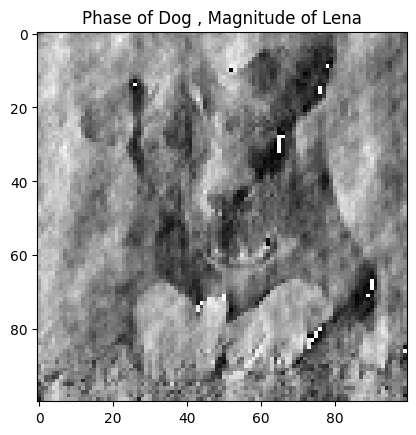

In [59]:
# swap phases and magnitudes 

# Task1 
# phase of dog and magnitude of lena 
new_img1_mag , new_img1_phase = np.abs(lena_f),np.angle(dog_f)

# apply idft 
# Reconstruct outputs 
new_img1  =  np.fft.ifft2 (new_img1_mag*np.exp(1j*new_img1_phase)).real.astype('uint8')

# display 
plt.imshow(new_img1,cmap='gray')
plt.title('Phase of Dog , Magnitude of Lena')

#### Inference 
We can majorly see the dog in the outline. This agrees with our intution that the phase dominates the magnitude in case of images 

Task 2 with inbuilt function 

Text(0.5, 1.0, 'Phase of Lena , Magnitude of dog')

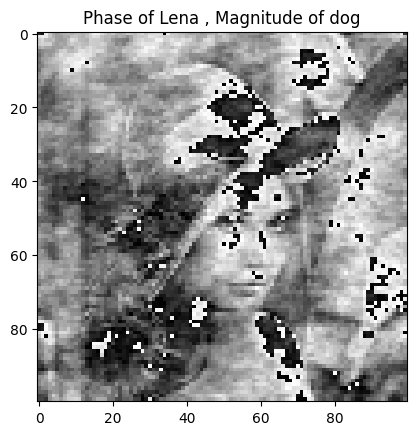

In [60]:
# Phase of lena and magnitude of dog 
new_img2_mag , new_img2_phase = np.abs(dog_f),np.angle(lena_f)

# apply idft 

# reconstruct image 
new_img2 = np.fft.ifft2(new_img2_mag*np.exp(1j*new_img2_phase)).real.astype('uint8')

# display the image 
plt.imshow(new_img2,cmap='gray')
plt.title('Phase of Lena , Magnitude of dog')

#### Inference 
We can majorly see Lena in the outline. This agrees with our intution that the phase dominates the magnitude in case of images 

Lets perform the same task with our own functions 

In [143]:
def FFT_paddded(signal):
    N = len(signal)

    # algo works for N , being power of 2 
    if N == 1:
        return signal
    
    # obtain odd and even values 
    even_signal = FFT_paddded(signal[::2])
    odd_signal =  FFT_paddded(signal[1::2])

    # Combining odd and even
    res = np.zeros(N, dtype =np.complex_)
    for u in range(N//2):
        res[u] = even_signal[u] + np.exp(-2j*np.pi*u/N)*odd_signal[u]
        res[u+N//2] = even_signal[u] - np.exp(-2j*np.pi*u/N)*odd_signal[u]
    return res 

def FFT(signal):
    N_init = len(signal)

    # finding the nearest power of 2 to pad to
    N = 2**int(np.ceil(np.log2(N_init)))
    signal_padded = np.zeros(N, dtype = signal.dtype)

    # setting the first N inital values as the signal values , rest will be 0 
    signal_padded[:N_init] = signal

    # perform FFT on this 
    res_signal = FFT_paddded(signal_padded)

    # again now to obtain final , remove the padded 
    signal_f = res_signal[:N_init]
    return signal_f


def pad_to_power_of_two(image):
    """Pad the image with zeros to the nearest power of 2 in both dimensions"""
    h, w = image.shape[:2]
    padded_h = 2 ** int(np.ceil(np.log2(h)))
    padded_w = 2 ** int(np.ceil(np.log2(w)))
    padded_image = np.zeros((padded_h, padded_w) + image.shape[2:], dtype=image.dtype)
    padded_image[:h, :w] = image
    return padded_image

def FFT2D(imgN):
    # obtain the r and c of img
    height , width = imgN.shape
    img = pad_to_power_of_two(imgN)
    r , c = img.shape

    fft_res = np.zeros((r,c),dtype = complex)

    # loop through r's then columns 

    for i in range(r):
        fft_res[i,:] = FFT(img[i,:])
    for j in range(c) : 
        fft_res[:,j] = FFT(fft_res[:,j])
    
    return fft_res , imgN.shape




In [144]:
# defining the function to perform inverse discrete fourier transform for images using fft_1D function
def idft_2D(image):
    rows, cols = image.shape
    idft = np.zeros((rows, cols), dtype=complex)
    for i in range(rows):
        idft[i,:] = FFT(image[i,:])
    for i in range(cols):
        idft[:,i] = FFT(idft[:,i])
    idft /= (rows * cols)
    idft = np.fliplr(idft)
    idft = np.flipud(idft)
    return idft

In [145]:
# apply fft without using inbuilt 

# apply dft on dog 
dog_fi , org_dimDog = FFT2D(dog)

# apply dft on lena 
lena_fi , org_dimLena= FFT2D(lena)

Task 1 without using inbuilt 

Text(0.5, 1.0, 'Phase of Dog , Magnitude of Lena')

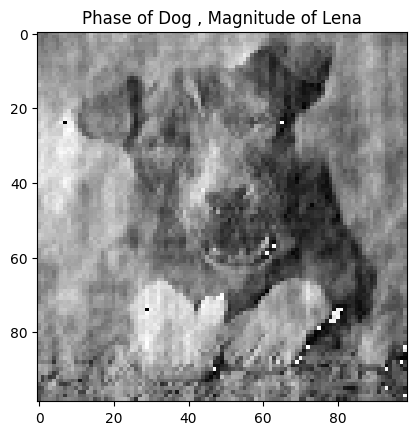

In [147]:


# Task1 
# phase of dog and magnitude of lena 
new_img3_mag , new_img3_phase = np.abs(lena_fi),np.angle(dog_fi)

# apply idft 
# Reconstruct outputs 
new_img3  = idft_2D(new_img3_mag*np.exp(1j*new_img3_phase)).real.astype('uint8')
# display
new_img3 = new_img3[:org_dimDog[0]-1,:org_dimDog[1]-1]

plt.imshow(new_img3,cmap='gray')
plt.title('Phase of Dog , Magnitude of Lena')


Text(0.5, 1.0, 'Phase of Dog , Magnitude of Lena')

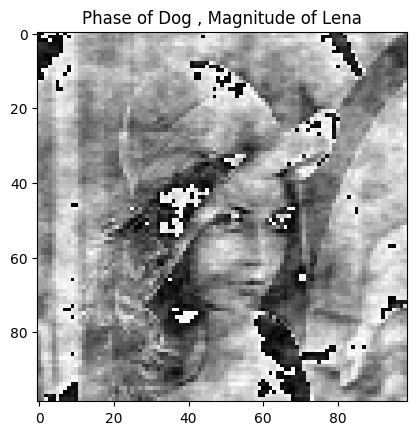

In [149]:
# Task2 
# phase of lena and magnitude of dog
new_img4_mag , new_img4_phase = np.abs(dog_fi),np.angle(lena_fi)

# apply idft 
# Reconstruct outputs 
new_img4  =  idft_2D (new_img4_mag*np.exp(1j*new_img4_phase)).real.astype('uint8')
# display
new_img4 = new_img4[:org_dimLena[0]-1,:org_dimLena[1]-1]

plt.imshow(new_img4,cmap='gray')
plt.title('Phase of Dog , Magnitude of Lena')

#### Inferences 
The same inferences for the task for inbuilt holds here also 